https://lilianweng.github.io/lil-log/2021/07/11/diffusion-models.html#:~:text=Diffusion%20models%20are%20a%20new,to%20analytically%20evaluate%20the%20distribution.&text=Diffusion%20models%20are%20inspired%20by%20non%2Dequilibrium%20thermodynamics.

In [13]:
from sklearn.datasets import make_swiss_roll
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from typing import Tuple

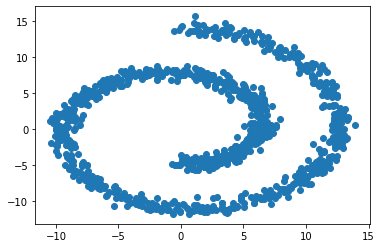

In [15]:
class TargetDistribution:
    
    def __init__(self, noise: float = 0.5):
        self.noise = noise
        
    def sample(self, sample_shape: Tuple[int]):
        x_0, _ = make_swiss_roll(n_samples=sample_shape[0], noise=self.noise)  # 3D
        return x_0[:, [0,2]]  # 2D
    
q = TargetDistribution()
x_0 = q.sample(sample_shape=(1000,))
plt.scatter(*x_0.T)
plt.show()

In [ ]:
num_steps = 100
batch_size = 8


def criterion(x_0, z_theta, z_t, alpha_bar_t, t):
    L_simple_t = torch.sum(torch.square(z_t - z_theta(torch.sqrt(alpha_bar_t) * x_0 + torch.sqrt(1 - alpha_bar_t) * z_t, t)), dim=1).mean()
    return L_simple_t

def training_loop(num_steps, z_theta, optimizer, q):
    
    for step in num_steps:
        x_0 = q.sample(sample_shape=(batch_size,))
        
        optimizer.zero_grad(set_to_none=True)
        loss = criterion(x_0, z_theta, z_t, alpha_bar_t, t)
        loss.backward()
        optimizer.step()